In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X = X[y<2, :2]
y = y[y<2]

In [5]:
X.shape

(100, 2)

In [6]:
y.shape

(100,)

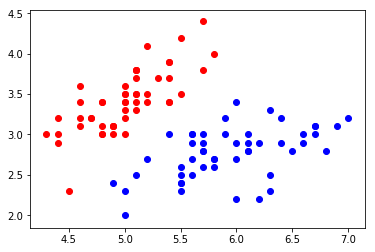

In [7]:
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'red')
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'blue')
plt.show()

In [8]:
from myscript.train_test_split import train_test_split

In [9]:
X_train, y_train, X_test, y_test = train_test_split(X,y , seed=666)

In [10]:
X_train.shape

(80, 2)

In [11]:
y_train.shape

(80,)

In [12]:
from myscript.Logisticegression import Logisticegression

In [13]:
log_reg = Logisticegression()

In [14]:
log_reg.fit(X_train, y_train)

Logisticegression()

In [15]:
log_reg.score(X_test, y_test)

1.0

In [16]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.17601199, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [17]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [18]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

# 决策边界

In [19]:
def X2(x1):
    return (-log_reg.coef_[0]*x1- log_reg.intercept_)/log_reg.coef_[1]

In [20]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = X2(x1_plot)

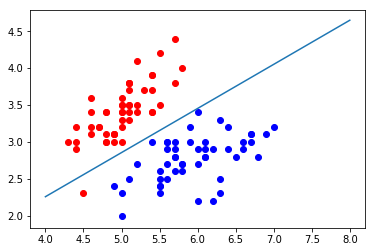

In [21]:
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'red')
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'blue')
plt.plot(x1_plot, x2_plot)
plt.show()

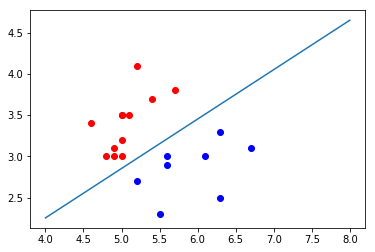

In [22]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color = 'red')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color = 'blue')
plt.plot(x1_plot, x2_plot)
plt.show()

# 不规则边界的绘制

In [23]:
def plot_decision_boundary(model, axis):
    # 【3， 8， 9， 12】
    # 网格矩阵
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Users\Eric\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


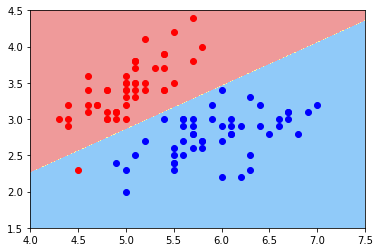

In [24]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'red')
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'blue')
plt.show()

# knn的决策边界

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn_clf = KNeighborsClassifier()

In [27]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
knn_clf.score(X_test, y_test)

1.0

C:\Users\Eric\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


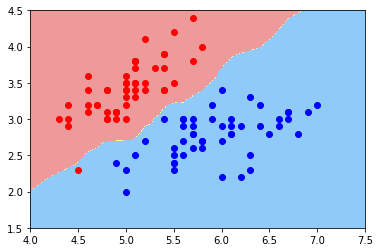

In [29]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'red')
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'blue')
plt.show()

In [30]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

C:\Users\Eric\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


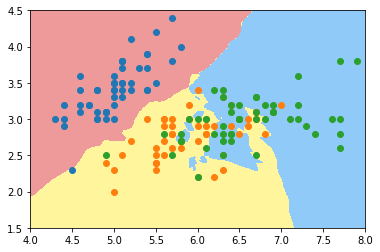

In [31]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

C:\Users\Eric\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


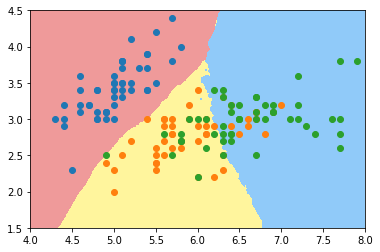

In [32]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

# 多项式特征加入逻辑回归

In [33]:
X = np.random.normal(0, 1, size=(200, 2))

In [34]:
y = np.array((X[:,0]**2 + X[:,1]**2 < 1.5 ), dtype='int')

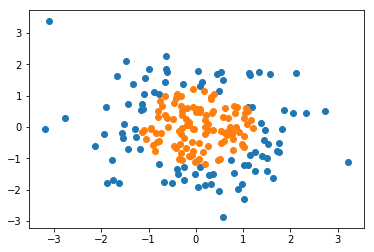

In [35]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [36]:
from myscript.Logisticegression import Logisticegression

In [37]:
log_reg = Logisticegression()

In [38]:
log_reg.fit(X, y)

Logisticegression()

In [39]:
log_reg.score(X,y)

1.0

C:\Users\Eric\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


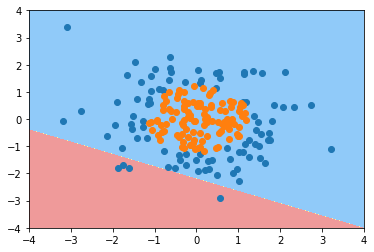

In [40]:
plot_decision_boundary(log_reg, axis=[-4, 4,-4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [46]:
def PolynomialRgression(degree):
    return Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression())
])


In [47]:
poly_log_reg = PolynomialRgression(degree=2)

In [48]:
poly_log_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [49]:
poly_log_reg.score(X, y)

0.95

C:\Users\Eric\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


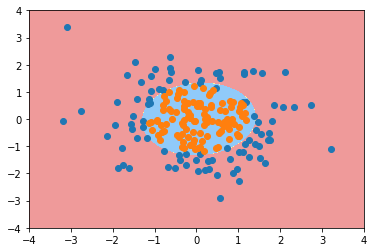

In [50]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4,-4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [51]:
poly_log_reg2 = PolynomialRgression(degree=20)
poly_log_reg2.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

C:\Users\Eric\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


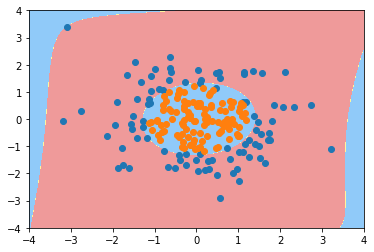

In [52]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4,-4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

# 逻辑回归模型正则化

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [55]:
X_train.shape

(150, 2)

In [56]:
X_test.shape

(50, 2)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_reg = LogisticRegression()

In [59]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
log_reg.score(X_train, y_train)

0.66

In [61]:
log_reg.score(X_test, y_test)

0.6

C:\Users\Eric\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


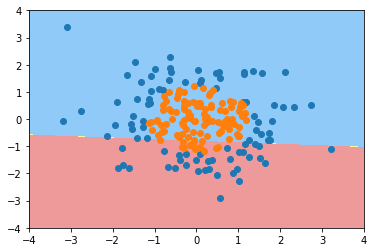

In [62]:
plot_decision_boundary(log_reg, axis=[-4, 4,-4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [63]:
def PolynomialRgression(degree):
    return Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression())
])

In [64]:
poly_log_reg2 = PolynomialRgression(degree=2)
poly_log_reg2.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [65]:
poly_log_reg2.score(X_train,y_train)

0.96

In [66]:
poly_log_reg2.score(X_test,y_test)

0.96

C:\Users\Eric\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


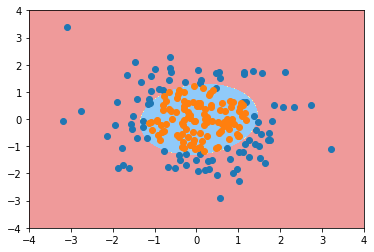

In [67]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4,-4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [68]:
poly_log_reg20 = PolynomialRgression(degree=20)
poly_log_reg20.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [69]:
poly_log_reg20.score(X_test,y_test)

0.94

In [70]:
poly_log_reg20.score(X_train,y_train)

0.9533333333333334

C:\Users\Eric\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


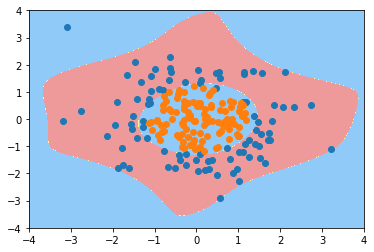

In [72]:
plot_decision_boundary(poly_log_reg20, axis=[-4, 4,-4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [73]:
def PolynomialRgression(degree,C):
    return Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C = C))
])

In [74]:
poly_log_reg3 = PolynomialRgression(degree=20, C=0.1)
poly_log_reg3.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [75]:
poly_log_reg3.score(X_test,y_test)

0.86

In [76]:
poly_log_reg3.score(X_train,y_train)

0.8733333333333333

C:\Users\Eric\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


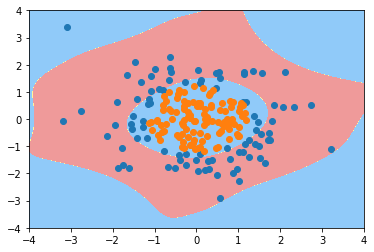

In [77]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4,-4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [78]:
def PolynomialRgression(degree,C,  penalty='l2'):
    return Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C = C, penalty=penalty))
])

In [79]:
poly_log_reg4 = PolynomialRgression(degree=20, C=0.1, penalty='l1')
poly_log_reg4.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [80]:
poly_log_reg4.score(X_test,y_test)

0.94

In [81]:
poly_log_reg4.score(X_train,y_train)

0.88

C:\Users\Eric\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


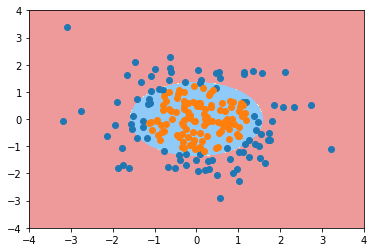

In [82]:
plot_decision_boundary(poly_log_reg4, axis=[-4, 4,-4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()